# 1D Heat Diffusion Equation: Weak Formulation and Finite Element Discretization

## 1. Governing Equation

The 1D heat diffusion (conduction) equation is given by:
$
\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}
$
where:
- $u(x, t)$: Temperature at position $x$ and time $t$
- $\alpha$: Thermal diffusivity

## 2. Boundary and Initial Conditions

- **Dirichlet Boundary Conditions:** $u(0, t) = u(L, t) = 0$
- **Initial Condition:** $u(x, 0) = u_0(x)$

## 3. Weak (Variational) Formulation

Multiply both sides by a test function $v(x)$ and integrate over the domain $[0, L]$:

$
\int_0^L v \frac{\partial u}{\partial t} \, dx = \alpha \int_0^L v \frac{\partial^2 u}{\partial x^2} \, dx
$

Apply integration by parts to the right-hand side:

$
\int_0^L v \frac{\partial^2 u}{\partial x^2} \, dx = \left[ v \frac{\partial u}{\partial x} \right]_0^L - \int_0^L \frac{\partial v}{\partial x} \frac{\partial u}{\partial x} \, dx
$

With Dirichlet BCs, the boundary term vanishes, so:

$
\int_0^L v \frac{\partial u}{\partial t} \, dx + \alpha \int_0^L \frac{\partial v}{\partial x} \frac{\partial u}{\partial x} \, dx = 0
$

## 4. Spatial Discretization: Finite Element Method

- Divide the domain into $N$ elements.
- Approximate $u(x, t)$ using basis (shape) functions $\phi_j(x)$:
 
$
u(x, t) \approx \sum_{j=1}^N U_j(t) \phi_j(x)
$

- For galerkin method, choose test functions $v(x) = \phi_i(x)$:

$
v(x) = \phi_i(x)
$

Substitute into the weak form:

$
\sum_{j=1}^N \left[ \int_0^L \phi_i \phi_j \, dx \right] \frac{dU_j}{dt} + \alpha \sum_{j=1}^N \left[ \int_0^L \frac{d\phi_i}{dx} \frac{d\phi_j}{dx} \, dx \right] U_j = 0
$

Define:
- **Mass Matrix:** $M_{ij} = \int_0^L \phi_i \phi_j \, dx$
- **Stiffness Matrix:** $K_{ij} = \int_0^L \frac{d\phi_i}{dx} \frac{d\phi_j}{dx} \, dx$

The semi-discrete system:
$
M \frac{d\mathbf{U}}{dt} + \alpha K \mathbf{U} = 0
$

## 5. Time Discretization: Implicit Euler

Discretize in time using implicit Euler:
$
M \frac{\mathbf{U}^{n+1} - \mathbf{U}^n}{\Delta t} + \alpha K \mathbf{U}^{n+1} = 0
$

Rearrange:
$
(M + \Delta t \, \alpha K) \mathbf{U}^{n+1} = M \mathbf{U}^n
$

## 6. Implementation Steps

1. **Mesh Generation:** Define nodes and elements.
2. **Element Matrices:** Compute local mass and stiffness matrices for each element.
3. **Assembly:** Assemble global mass $M$ and stiffness $K$ matrices.
4. **Apply Boundary Conditions:** Modify matrices to enforce Dirichlet BCs.
5. **Time Stepping:** At each time step, solve the linear system for $\mathbf{U}^{n+1}$.
6. **Visualization:** Plot the temperature profile at different times.

This process is implemented in the code below using JAX and NumPy for efficient computation.

## 4. Spatial Discretization: Finite Element Method (FEM) in Detail

### Mesh and Elements

- The domain $[0, L]$ is divided into $N$ nodes, forming $N-1$ elements.
- Each element spans between two adjacent nodes, e.g., element $e$ connects nodes $e$ and $e+1$.

### Shape Functions

- For 1D linear elements, we use **linear (hat) shape functions** on each element.
- On element $e$ with local coordinates $\xi \in [0, 1]$:
    - $\phi_1(\xi) = 1 - \xi$ (associated with the left node)
    - $\phi_2(\xi) = \xi$ (associated with the right node)
- These functions satisfy:
    - $\phi_1(0) = 1$, $\phi_1(1) = 0$
    - $\phi_2(0) = 0$, $\phi_2(1) = 1$

### Derivatives of Shape Functions

- The derivatives with respect to the local coordinate $\xi$ are:
    - $\frac{d\phi_1}{d\xi} = -1$
    - $\frac{d\phi_2}{d\xi} = 1$
- To convert to the physical coordinate $x$, use the mapping:
    - $x = x_e + \xi \cdot dx$, where $dx$ is the element length.
    - $\frac{d}{dx} = \frac{d\xi}{dx} \frac{d}{d\xi} = \frac{1}{dx} \frac{d}{d\xi}$

### Local Element Matrices

- **Mass Matrix (Me):**
    $$
    Me_{ij} = \int_{x_e}^{x_{e+1}} \phi_i(x) \phi_j(x) \, dx
    $$
    For linear elements, this evaluates to:
    $$
    Me = \frac{dx}{6} \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}
    $$

- **Stiffness Matrix (Ke):**
    $$
    Ke_{ij} = \int_{x_e}^{x_{e+1}} \frac{d\phi_i}{dx} \frac{d\phi_j}{dx} \, dx
    $$
    For linear elements, this evaluates to:
    $$
    Ke = \frac{1}{dx} \begin{bmatrix} 1 & -1 \\ -1 & 1 \end{bmatrix}
    $$

### Assembly

- The local matrices are assembled into global matrices by summing contributions from each element to the corresponding global nodes.
- This process ensures continuity of the solution across elements and enforces the variational formulation globally.

## Evaluation of the Local Stiffness Matrix for 1D Linear Elements

The local stiffness matrix for an element $e$ is defined as:
$$
Ke_{ij} = \int_{x_e}^{x_{e+1}} \frac{d\phi_i}{dx} \frac{d\phi_j}{dx} \, dx
$$

**Step 1: Shape Function Derivatives**

For linear elements on $[x_e, x_{e+1}]$:
- $\phi_1(x) = \frac{x_{e+1} - x}{dx}$
- $\phi_2(x) = \frac{x - x_e}{dx}$
- $dx = x_{e+1} - x_e$

Their derivatives with respect to $x$:
- $\frac{d\phi_1}{dx} = -\frac{1}{dx}$
- $\frac{d\phi_2}{dx} = \frac{1}{dx}$

**Step 2: Substitute into the Integral**

Since the derivatives are constants:
- $Ke_{11} = \int_{x_e}^{x_{e+1}} \left(-\frac{1}{dx}\right)\left(-\frac{1}{dx}\right) dx = \frac{1}{dx^2} \cdot dx = \frac{1}{dx}$
- $Ke_{12} = \int_{x_e}^{x_{e+1}} \left(-\frac{1}{dx}\right)\left(\frac{1}{dx}\right) dx = -\frac{1}{dx^2} \cdot dx = -\frac{1}{dx}$
- $Ke_{21} = Ke_{12}$
- $Ke_{22} = \int_{x_e}^{x_{e+1}} \left(\frac{1}{dx}\right)\left(\frac{1}{dx}\right) dx = \frac{1}{dx^2} \cdot dx = \frac{1}{dx}$

**Step 3: Assemble the Matrix**

Thus, the local stiffness matrix is:
$$
Ke = \frac{1}{dx}
\begin{bmatrix}
1 & -1 \\
-1 & 1
\end{bmatrix}
$$

## Evaluation of the Local Mass Matrix for 1D Linear Elements
The local mass matrix for an element $e$ is defined as:
$$
Me_{ij} = \int_{x_e}^{x_{e+1}} \phi_i(x) \phi_j(x) \, dx
$$

**Step 1: Express Shape Functions**

For linear elements on $[x_e, x_{e+1}]$:
- $\phi_1(x) = \frac{x_{e+1} - x}{dx}$
- $\phi_2(x) = \frac{x - x_e}{dx}$
- $dx = x_{e+1} - x_e$

**Step 2: Change of Variable to Local Coordinate**

Let $\xi \in [0, 1]$ be the local coordinate, with $x = x_e + \xi dx$:
- $\phi_1(\xi) = 1 - \xi$
- $\phi_2(\xi) = \xi$
- $dx = x_{e+1} - x_e$
- $dx = \frac{dx}{d\xi}$

**Step 3: Compute the Integrals**

Compute each entry:
- $Me_{11} = \int_0^1 (1-\xi)(1-\xi) dx = dx \int_0^1 (1-\xi)^2 d\xi$
- $Me_{12} = \int_0^1 (1-\xi)\xi dx = dx \int_0^1 (1-\xi)\xi d\xi$
- $Me_{21} = Me_{12}$
- $Me_{22} = \int_0^1 \xi\xi dx = dx \int_0^1 \xi^2 d\xi$

Evaluate:
- $\int_0^1 (1-\xi)^2 d\xi = \int_0^1 (1 - 2\xi + \xi^2) d\xi = [\xi - \xi^2 + \frac{\xi^3}{3}]_0^1 = 1 - 1 + \frac{1}{3} = \frac{1}{3}$
- $\int_0^1 (1-\xi)\xi d\xi = \int_0^1 (\xi - \xi^2) d\xi = [\frac{\xi^2}{2} - \frac{\xi^3}{3}]_0^1 = \frac{1}{2} - \frac{1}{3} = \frac{1}{6}$
- $\int_0^1 \xi^2 d\xi = [\frac{\xi^3}{3}]_0^1 = \frac{1}{3}$

**Step 4: Assemble the Matrix**

Thus, the local mass matrix is:
$$
Me = dx \begin{bmatrix}
\frac{1}{3} & \frac{1}{6} \\
\frac{1}{6} & \frac{1}{3}
\end{bmatrix}
= \frac{dx}{6}
\begin{bmatrix}
2 & 1 \\
1 & 2
\end{bmatrix}
$$

## Assembly of Global Matrix from Local Element Matrices

The assembly process constructs the global mass and stiffness matrices from the local (element) matrices by summing contributions from each element to the corresponding global nodes.

**Steps:**

1. **Initialize Global Matrices:**  
    Create zero matrices for the global mass ($M$) and stiffness ($K$) of size $N \times N$, where $N$ is the number of nodes.

2. **Loop Over Elements:**  
    For each element $e$ (from $0$ to $N-2$ for $N$ nodes):
    - Identify the global node indices for the element, e.g., $[e, e+1]$ for 1D linear elements.

3. **Add Local Contributions:**  
    For each element, add the entries of the local mass ($Me$) and stiffness ($Ke$) matrices to the corresponding positions in the global matrices:
    $$
    M[\text{idx}, \text{idx}] += Me
    $$
    $$
    K[\text{idx}, \text{idx}] += Ke
    $$
    where `idx` is the array of global node indices for the element.

4. **Repeat for All Elements:**  
    This process is repeated for all elements, ensuring that shared nodes accumulate contributions from adjacent elements.

**Result:**  
The assembled global matrices $M$ and $K$ represent the entire domain, incorporating the connectivity and overlap of the finite elements.

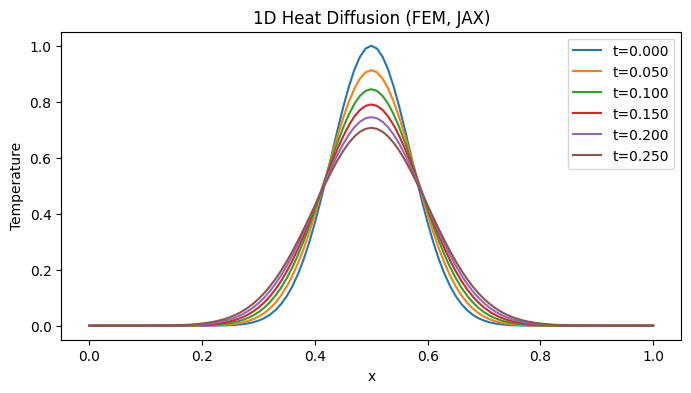

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

# 1. Parameters
L = 1.0
Nx = 101
dx = L / (Nx - 1)
alpha = 0.01
dt = 0.0005
Nt = 500

# 2. Mesh and initial condition
x = jnp.linspace(0, L, Nx)
u0 = jnp.exp(-100 * (x - L/2)**2)

# 3. Assemble element matrices (linear shape functions)
def element_matrices(dx, alpha):
    # Mass matrix (consistent)
    Me = (dx / 6.0) * jnp.array([[2, 1], [1, 2]])
    # Stiffness matrix
    Ke = (alpha / dx) * jnp.array([[1, -1], [-1, 1]])
    return Me, Ke

Me, Ke = element_matrices(dx, alpha)

# 4. Assemble global matrices
def assemble(Nx, Me, Ke):
    N = Nx
    M = jnp.zeros((N, N))
    K = jnp.zeros((N, N))
    for e in range(N-1):
        idx = jnp.array([e, e+1])
        M = M.at[jnp.ix_(idx, idx)].add(Me)
        K = K.at[jnp.ix_(idx, idx)].add(Ke)
    return M, K

M, K = assemble(Nx, Me, Ke)

# 5. Apply Dirichlet BCs (u=0 at both ends)
def apply_bc_matrix(M, K):
    M = M.at[0,:].set(0).at[-1,:].set(0)
    M = M.at[:,0].set(0).at[:,-1].set(0)
    M = M.at[0,0].set(1).at[-1,-1].set(1)
    K = K.at[0,:].set(0).at[-1,:].set(0)
    K = K.at[:,0].set(0).at[:,-1].set(0)
    return M, K

M_bc, K_bc = apply_bc_matrix(M, K)

# 6. Time stepping (implicit Euler: (M + dt*K) u^{n+1} = M u^n)
A = M_bc + dt * K_bc
A_inv = jnp.linalg.inv(A)

@jax.jit
def step(u, M_bc, A_inv):
    b = M_bc @ u
    u_new = A_inv @ b
    # Enforce Dirichlet BCs
    u_new = u_new.at[0].set(0.0).at[-1].set(0.0)
    return u_new

def run_sim(u0, Nt, M_bc, A_inv):
    u = u0
    us = [u0]
    for _ in range(Nt):
        u = step(u, M_bc, A_inv)
        us.append(u)
    return jnp.stack(us)

# 7. Run and plot
us = run_sim(u0, Nt, M_bc, A_inv)

plt.figure(figsize=(8,4))
for i in range(0, Nt+1, Nt//5):
    plt.plot(x, us[i], label=f"t={i*dt:.3f}")
plt.xlabel("x")
plt.ylabel("Temperature")
plt.title("1D Heat Diffusion (FEM, JAX)")
plt.legend()
plt.show()